### Import Packages

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Create Distance Functions

In [5]:
def minkowski_dist(x_1, x_2, p):
    return np.sum(np.abs(x_1 - x_2) ** p, axis = 1) ** (1 / p)

def taxicab_dist(x_1, x_2):
    return minkowski_dist(x_1, x_2, 1)

def euclidian_dist(x_1, x_2):
    return minkowski_dist(x_1, x_2, 2)

def chebychev_dist(x_1, x_2):
    return np.max(np.abs(x_1 - x_2))

def canberra_dist(x_1, x_2):
    return np.sum(np.abs(x_1 - x_2) / (np.abs(x_1) + np.abs(x_2)))

### Create Point Object

In [136]:
class Point:
    
    def __init__(self, X, index):
        self.X = X
        self.index = index
        self.visited = False
        self.noise = False
        self.cluster = None
        self.label = None
    
    def __str__(self):
        return str(self.X)
    
    def __eq__(self, other):
        return self.index == other.index
    
    def __hash__(self):
        return hash(self.index)
    
    def get_dist(self, other):
        return euclidian_dist(self.X.reshape(1, -1), other.X.reshape(1, -1))
    
    def get_neighbors(self, points, epsilon):
        neighbors = set()
        for point in points:
            if self.get_dist(point) <= epsilon:
                neighbors.add(point)
        return neighbors

### Create DBSCAN Function

In [217]:
def dbscan(X, min_points, epsilon):
    points = {Point(X[i, :], i) for i in range(X.shape[0])}

    C = 0
    for p in points:
        if p.label != None: continue
        neighbors = p.get_neighbors(points, epsilon)
        if len(neighbors) < min_points:
            p.label = 'Noise'
            continue
        C += 1
        p.label = C
        seed = neighbors
        seed.remove(p)
        
        seed_size_old = 0
        while len(seed) > seed_size_old:
            seed_size_old = len(seed)
            for q in seed:
                if q.label == 'Noise': q.label = C
                if q.label != None: continue
                q.label = C
                neighbors = q.get_neighbors(points, epsilon)
                if len(neighbors) >= min_points:
                    seed = seed.union(neighbors)
                
    
    return [point.label for point in points]

### Implement DBSCAN

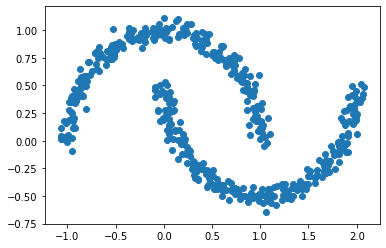

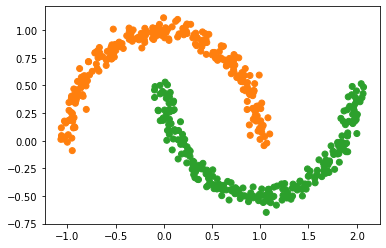

In [219]:
# X = np.array([[2, 3],
#               [3, 3],
#               [3, 4],
#               [0, 0],
#               [1, 0],
#               [-1, -1],
#               [-8, 1]])

X = datasets.make_moons(n_samples = 500, noise = .05, random_state = 0)[0]

plt.figure(0)
plt.scatter(X[:, 0], X[:, 1])

colors = ['black' if c == 'Noise' else 'C' + str(c) for c in dbscan(X, 5, .2)]

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], color = colors)

